In [1]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail() # get last five rows

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [2]:
# split data table into data X and class labels y

X = df.ix[:,0:4].values
y = df.ix[:,4].values

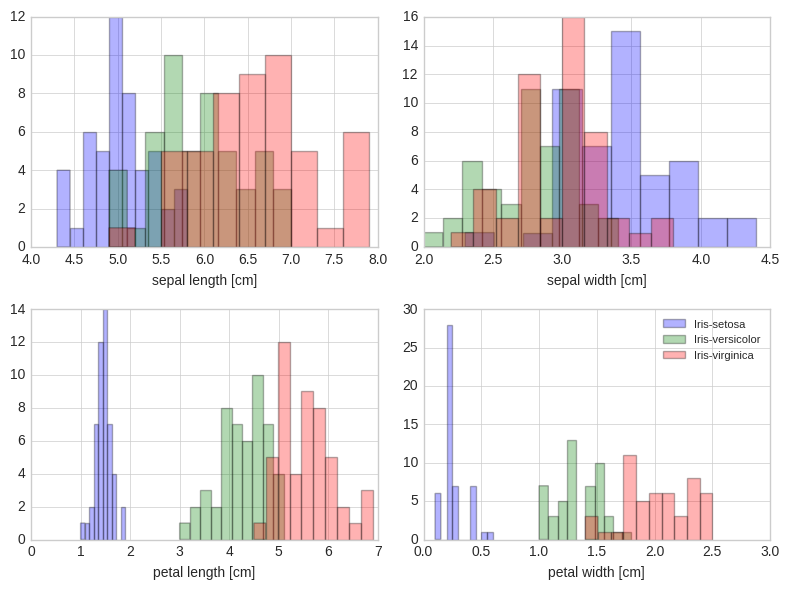

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import math

label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)


In [5]:
from sklearn.preprocessing import MinMaxScaler
data = [[0, 0], [0, 0], [1, 1], [2, 2]]
scaler = MinMaxScaler().fit_transform(data)
print(scaler)

[[0.  0. ]
 [0.  0. ]
 [0.5 0.5]
 [1.  1. ]]


In [6]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [7]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [8]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [9]:
u,s,v = np.linalg.svd(X_std.T)
print('Vectors U:\n', u)

Vectors U:
 [[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]


In [10]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [11]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.930353775589314
0.9274036215173412
0.14834222648163967
0.02074601399559621


In [12]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print(var_exp)
cum_var_exp = np.cumsum(var_exp)

[72.77045209380132, 23.03052326768065, 3.6838319576273864, 0.5151926808906394]


var_sum: 35128582.68441384


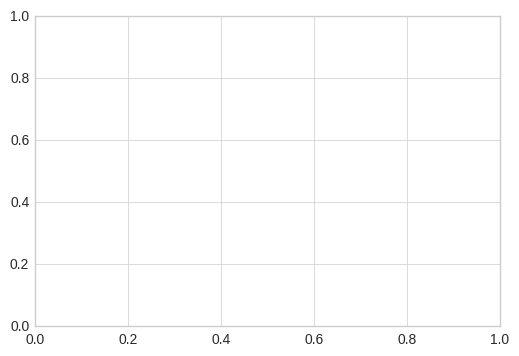

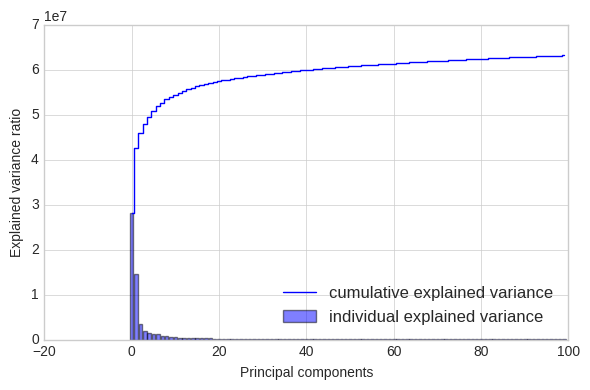

In [32]:
from sklearn.decomposition import PCA
def pca(std):  
    sklearn_pca = PCA(n_components=X)
    sklearn_pca.fit(data_std)
    result = sklearn_pca.transform(std)
    var_exp = sklearn_pca.explained_variance_
    cum_var_exp = np.cumsum(var_exp)
    print("var_sum:", sum(var_exp[1:]))
    return result

fp = 'Q4-analysis-input.in'
dataSet = []
D = 0
N = 0
distance_matrix = 0
X = 0
P = []

raw_data = open(fp).read()
#raw_data = raw_data.split('\n')

raw_data = [n.split() for n in raw_data.split('\n')] 

for i in range(len(raw_data)):
    for j in range(len(raw_data[i])):
        raw_data[i][j] = int(raw_data[i][j])

D = raw_data[0][0]
N = raw_data[1][0]
distance_matrix = raw_data[2][0]
X = raw_data[3][0]

for i in range(N + 1):
    if len(raw_data[i + 4])!= 0:
        dataSet.append(raw_data[i + 4])   
data_std = dataSet

if(X != -1):
    #data_std = standardize(dataSet)
    data_std = pca(data_std)
    
P = data_std[0] 


sklearn_pca = PCA(n_components=X)
sklearn_pca.fit(data_std)
sklearn_pca.transform(data_std)

var_exp = sklearn_pca.explained_variance_
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(X), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(X), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [1]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), 
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

NameError: name 'plt' is not defined

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def standardize(ls):
    return MinMaxScaler().fit_transform(ls)